In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

Problema #1:
Desarrolle una funci´on que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la
intensidad del color gris de cada pixel.

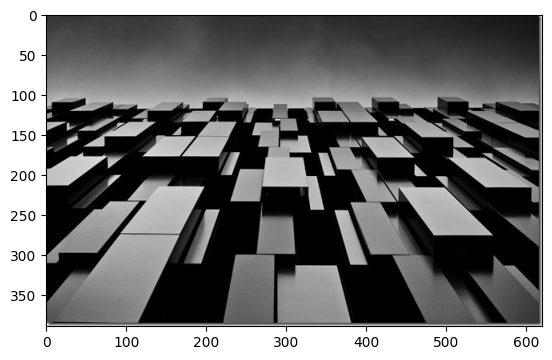

In [3]:
strImg = "imagen.jpg"
img = cv2.imread(strImg, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")

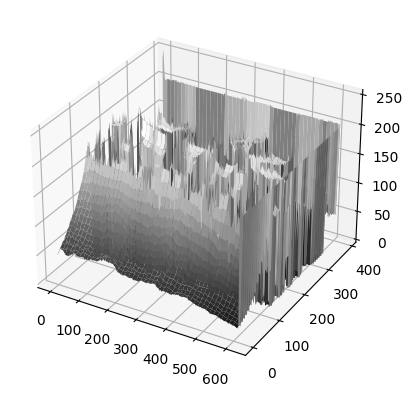

In [4]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
z = img

ax.plot_surface(x, y, z, cmap='gray')

plt.show()

Problema #2:
Implemente una funci´on para cada una de las transformaciones vistas en clase: negativa, lineal,
logar´ıtmica y exponencial.

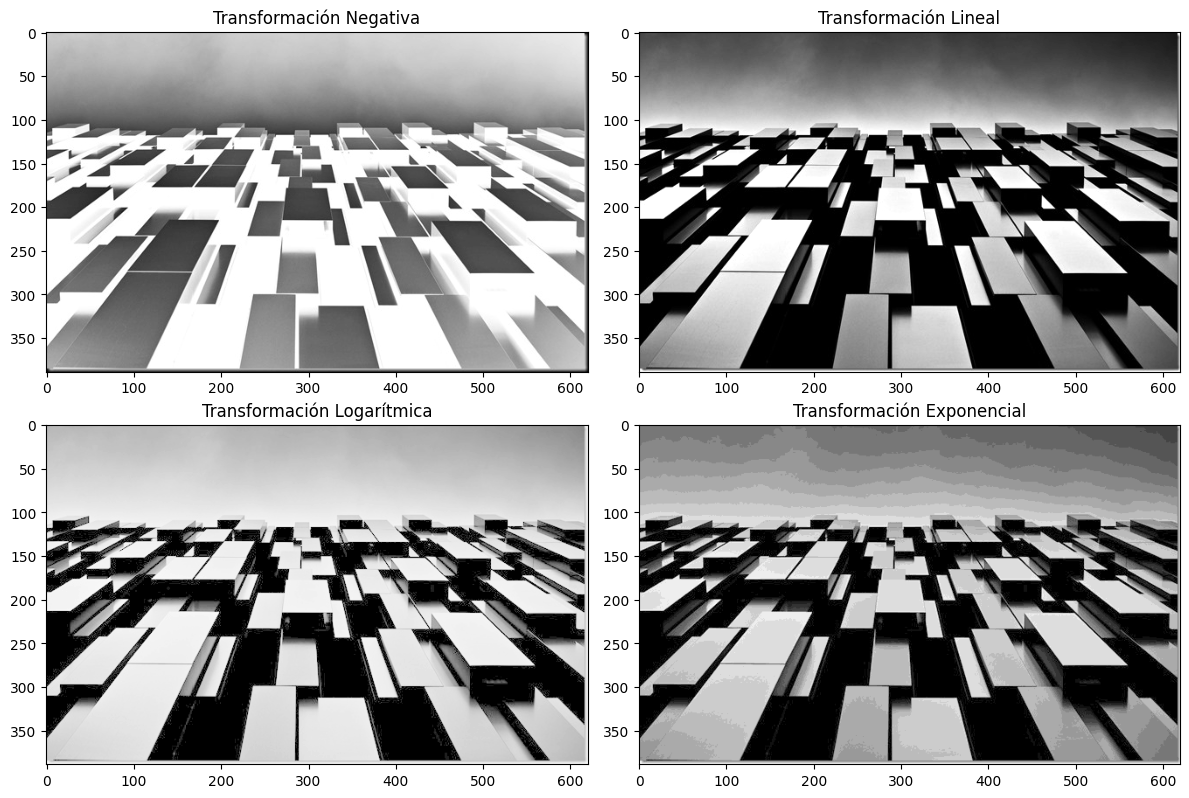

In [5]:
def transformacion_negativa(imagen):
    imagen_negativa = 255 - imagen
    return imagen_negativa
def transformacion_lineal(imagen, alpha, beta):
    imagen_lineal = np.clip(alpha * imagen + beta, 0, 255)
    return imagen_lineal
def transformacion_logaritmica(imagen, c=1):
    imagen_logaritmica = c * np.log1p(imagen)
    imagen_logaritmica = np.clip(imagen_logaritmica, 0, 255)
    return imagen_logaritmica.astype(np.uint8)
def transformacion_exponencial(imagen, gamma):
    imagen_exponencial = np.power(imagen, gamma)
    imagen_exponencial = np.clip(imagen_exponencial, 0, 255)
    return imagen_exponencial.astype(np.uint8)
imagen_transformada_negativa = transformacion_negativa(img)
imagen_transformada_lineal = transformacion_lineal(img, alpha=1.2, beta=30)
imagen_transformada_logaritmica = transformacion_logaritmica(img, c=40)
imagen_transformada_exponencial = transformacion_exponencial(img, gamma=0.5)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(imagen_transformada_negativa, cmap='gray')
plt.title("Transformación Negativa")

plt.subplot(2, 2, 2)
plt.imshow(imagen_transformada_lineal, cmap='gray')
plt.title("Transformación Lineal")

plt.subplot(2, 2, 3)
plt.imshow(imagen_transformada_logaritmica, cmap='gray')
plt.title("Transformación Logarítmica")

plt.subplot(2, 2, 4)
plt.imshow(imagen_transformada_exponencial, cmap='gray')
plt.title("Transformación Exponencial")

plt.tight_layout()
plt.show()

Problema #3:
Desarrolle una funci´on que dada dos im´agenes a color, realice las operaciones SUMA, RESTA, AND,
OR , XOR con ambas im´agenes recuerde que para realizar las operaciones l´ogicas es necesario pasar
la imagen a escala de grises y luego binarizarla.

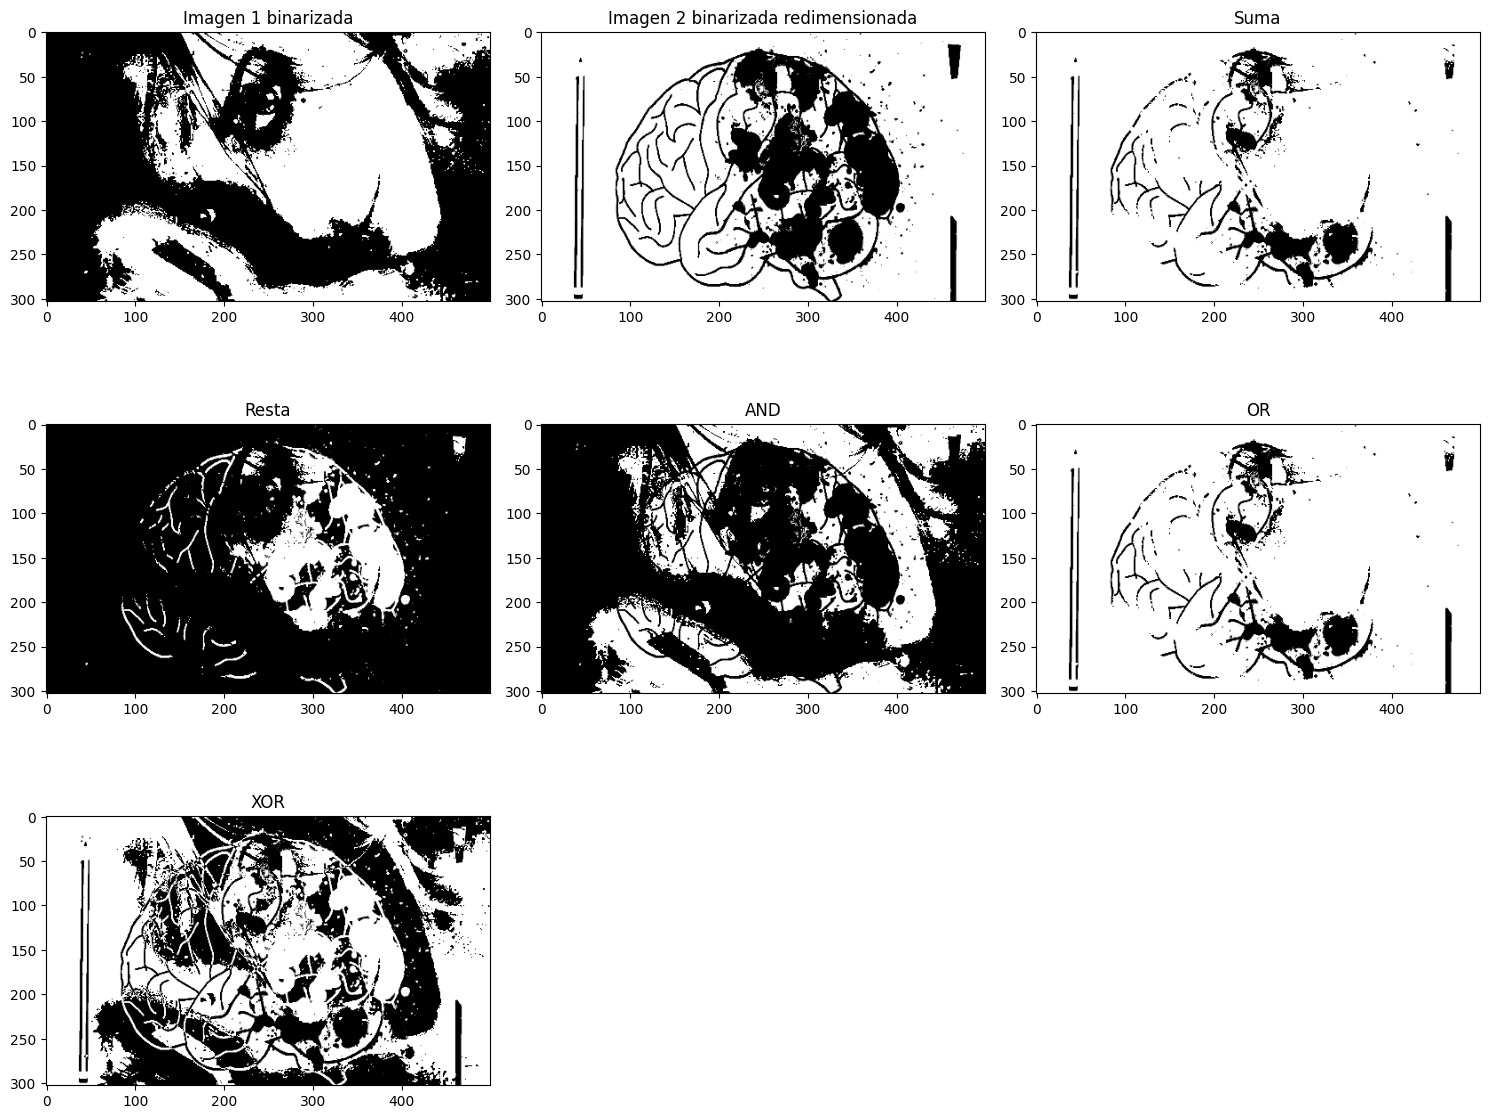

In [6]:
imagen1 = cv2.imread("color1.jpg")
imagen2 = cv2.imread("color2.jpg")

if imagen1 is None or imagen2 is None:
    print("No se pudieron cargar las imágenes")
else:
    def operaciones_logicas_binarias(imagen1, imagen2):
        imagen_gris1 = cv2.cvtColor(imagen1, cv2.COLOR_BGR2GRAY)
        imagen_gris2 = cv2.cvtColor(imagen2, cv2.COLOR_BGR2GRAY)

        # Binarizar las imágenes
        _, imagen_binaria1 = cv2.threshold(imagen_gris1, 128, 255, cv2.THRESH_BINARY)
        _, imagen_binaria2 = cv2.threshold(imagen_gris2, 128, 255, cv2.THRESH_BINARY)

        imagen_binaria2_redimensionada = cv2.resize(imagen_binaria2, (imagen_binaria1.shape[1], imagen_binaria1.shape[0]))

        resultado_suma = cv2.add(imagen_binaria1, imagen_binaria2_redimensionada)
        resultado_resta = cv2.subtract(imagen_binaria1, imagen_binaria2_redimensionada)
        resultado_and = cv2.bitwise_and(imagen_binaria1, imagen_binaria2_redimensionada)
        resultado_or = cv2.bitwise_or(imagen_binaria1, imagen_binaria2_redimensionada)
        resultado_xor = cv2.bitwise_xor(imagen_binaria1, imagen_binaria2_redimensionada)

        return imagen_binaria1, imagen_binaria2_redimensionada, resultado_suma, resultado_resta, resultado_and, resultado_or, resultado_xor

    imagen_binaria1, imagen_binaria2_redimensionada, resultado_suma, resultado_resta, resultado_and, resultado_or, resultado_xor = operaciones_logicas_binarias(imagen1, imagen2)

    plt.figure(figsize=(15, 12))

    plt.subplot(3, 3, 1)
    plt.imshow(imagen_binaria1, cmap='gray')
    plt.title("Imagen 1 binarizada")

    plt.subplot(3, 3, 2)
    plt.imshow(imagen_binaria2_redimensionada, cmap='gray')
    plt.title("Imagen 2 binarizada redimensionada")

    plt.subplot(3, 3, 3)
    plt.imshow(resultado_suma, cmap='gray')
    plt.title("Suma")

    plt.subplot(3, 3, 4)
    plt.imshow(resultado_resta, cmap='gray')
    plt.title("Resta")

    plt.subplot(3, 3, 5)
    plt.imshow(resultado_and, cmap='gray')
    plt.title("AND")

    plt.subplot(3, 3, 6)
    plt.imshow(resultado_or, cmap='gray')
    plt.title("OR")

    plt.subplot(3, 3, 7)
    plt.imshow(resultado_xor, cmap='gray')
    plt.title("XOR")

    plt.tight_layout()
    plt.show()

Problema #4:
Realice una comparaci´on entre el algoritmo de Canny, el operador de Sobel y el operador Laplaciano
para encontrar los bordes en una imagen, para este ejercicio puede utilizar las funciones de openCV
y cualquier imagen, como entregable debe mostrar una comparaciA˜n entre los tres enfoques con
una tabla donde se muestre las ventajas y desventajas de cada enfoque.

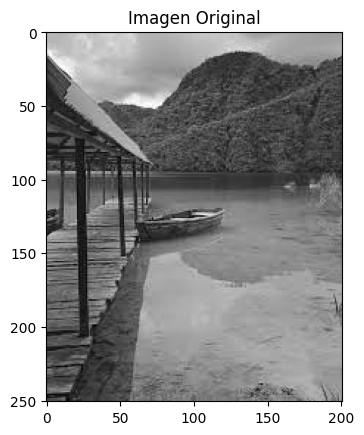

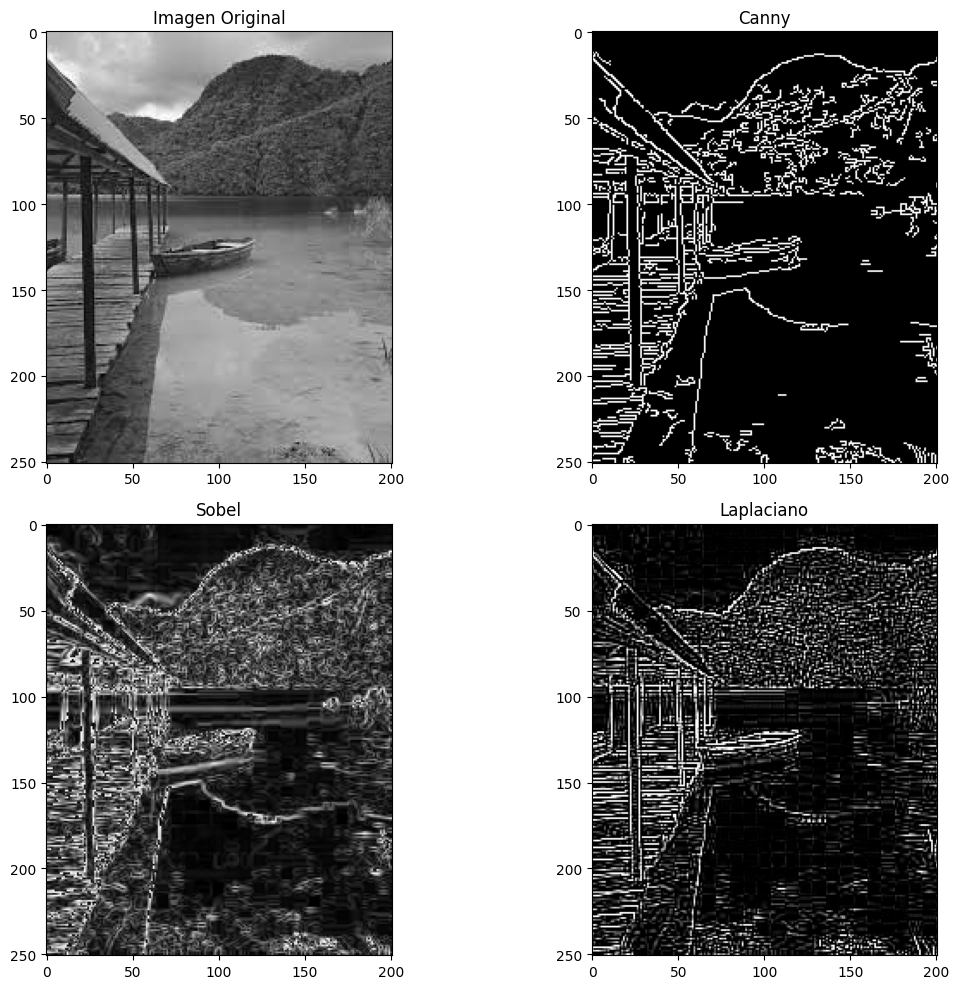

In [12]:
def comparar_deteccion_bordes(imagen):
    #Algoritmo Canny
    bordes_canny = cv2.Canny(imagen, 100, 200)

    #Operador Sobel
    sobel_x = cv2.Sobel(imagen, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(imagen, cv2.CV_64F, 0, 1, ksize=3)
    bordes_sobel = np.sqrt(sobel_x**2 + sobel_y**2).astype(np.uint8)

    #Operador Laplaciano
    bordes_laplaciano = cv2.Laplacian(imagen, cv2.CV_8U, ksize=3)

    plt.figure(figsize=(12, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(imagen, cmap='gray')
    plt.title("Imagen Original")

    plt.subplot(2, 2, 2)
    plt.imshow(bordes_canny, cmap='gray')
    plt.title("Canny")

    plt.subplot(2, 2, 3)
    plt.imshow(bordes_sobel, cmap='gray')
    plt.title("Sobel")

    plt.subplot(2, 2, 4)
    plt.imshow(bordes_laplaciano, cmap='gray')
    plt.title("Laplaciano")

    plt.tight_layout()
    plt.show()

# Cargar una imagen en escala de grises
strImg = "imagen3.jpg"
imagen = cv2.imread(strImg, cv2.IMREAD_GRAYSCALE)

# Mostrar la imagen original
plt.imshow(imagen, cmap="gray")
plt.title("Imagen Original")
plt.show()

comparar_deteccion_bordes(imagen)

Problema #5:
Utilizando funciones de OpenCV deber´a aplicar los filtros de convoluci´on de taman˜o de kernel (3x3,
5x5 y 7x7) las operaciones que deber´a realizar son las siguientes:
Kernel Gaussiano de riodo.
Kernel Box de ruido.
Kernel de mediana para ruido.
Kernel Sobel para detecci´on de bornes (en X e Y).
Kernel Lapaciano para detecci´on de bordes.
Kernel de realce (Sharpening).
Kernel de relieve (Embossing)


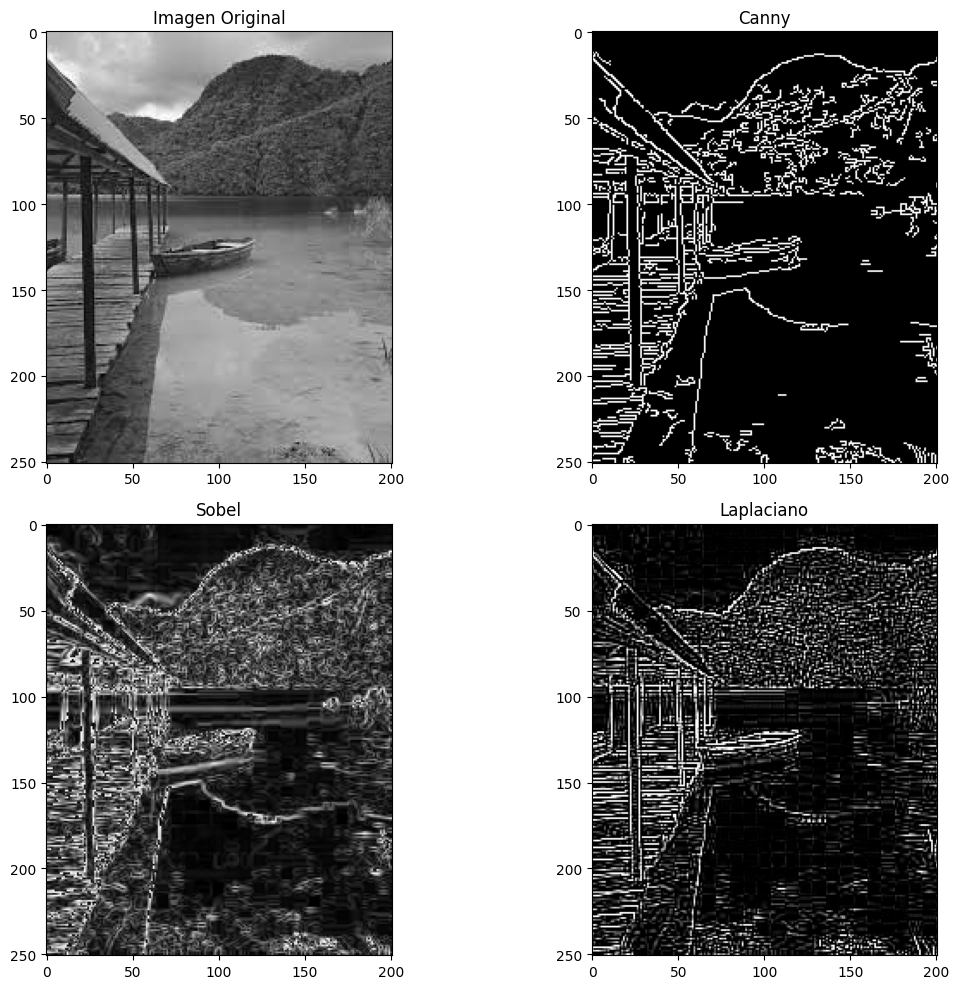

In [13]:
def comparar_deteccion_bordes(imagen):
    # Aplicar el algoritmo de Canny
    bordes_canny = cv2.Canny(imagen, 100, 200)

    # Aplicar el operador Sobel
    sobel_x = cv2.Sobel(imagen, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(imagen, cv2.CV_64F, 0, 1, ksize=3)
    bordes_sobel = np.sqrt(sobel_x**2 + sobel_y**2).astype(np.uint8)

    # Aplicar el operador Laplaciano
    bordes_laplaciano = cv2.Laplacian(imagen, cv2.CV_8U, ksize=3)

    # Mostrar los resultados
    plt.figure(figsize=(12, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(imagen, cmap='gray')
    plt.title("Imagen Original")

    plt.subplot(2, 2, 2)
    plt.imshow(bordes_canny, cmap='gray')
    plt.title("Canny")

    plt.subplot(2, 2, 3)
    plt.imshow(bordes_sobel, cmap='gray')
    plt.title("Sobel")

    plt.subplot(2, 2, 4)
    plt.imshow(bordes_laplaciano, cmap='gray')
    plt.title("Laplaciano")

    plt.tight_layout()
    plt.show()

strImg = "imagen3.jpg"
imagen = cv2.imread(strImg, cv2.IMREAD_GRAYSCALE)

comparar_deteccion_bordes(imagen)
